In [152]:
import numpy as np
import nbimporter
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
from LinearRegression import theoricalRange
%store -r tidy_df

Since the data is the same of the last model, I will go to the pre trained already

In [154]:
pre_trained_df = tidy_df.sort_index()
pre_trained_df

,h,H,R
0,17.8,30.0,22.75
1,17.8,30.0,22.90
2,17.8,30.0,22.75
3,17.8,30.0,22.75
4,17.8,30.0,22.65
...,...,...,...
380,17.9,25.0,17.05
381,17.9,25.0,16.85
382,17.9,25.0,17.00
383,17.9,25.0,17.15


<AxesSubplot:xlabel='H', ylabel='R'>

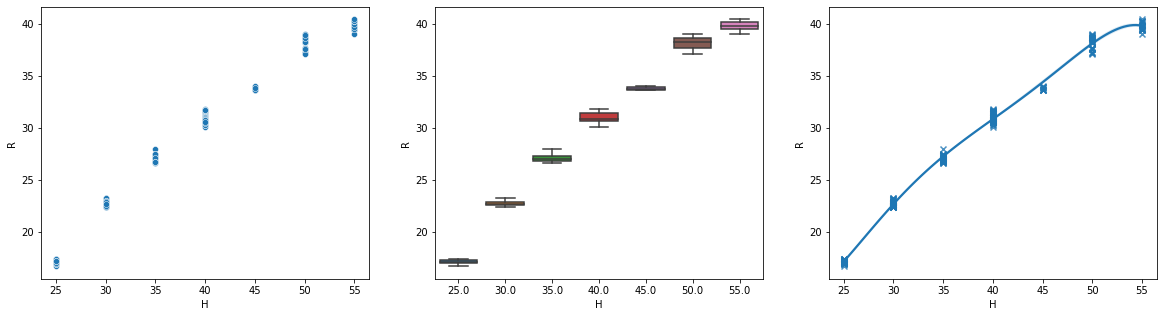

In [155]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
sns.scatterplot(data=pre_trained_df, x='H', y='R', ax=axes[0])
sns.boxplot(data=pre_trained_df, x='H', y='R', ax=axes[1])
sns.regplot(data=pre_trained_df, x='H', y='R', marker='x', order=5, ax=axes[2])

In [156]:
X, y = pre_trained_df.iloc[:, :-1], pre_trained_df.iloc[:, -1]

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [158]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((161, 2), (69, 2), (161,), (69,))

In [159]:
scaler = MinMaxScaler()

In [160]:
x_train_scaled = scaler.fit_transform(np.array(x_train))
x_test_scaled = scaler.fit_transform(np.array(x_test))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = scaler.fit_transform(np.array(y_test).reshape(-1, 1))

In [161]:
from sklearn.svm import LinearSVR, SVR
linear_svr, svr = LinearSVR(), SVR()

In [162]:
reg_1 = linear_svr.fit(x_train_scaled, y_train_scaled)
reg_2 = svr.fit(x_train_scaled, y_train_scaled)

c:\Users\migue\anaconda3\envs\tfgpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\migue\anaconda3\envs\tfgpu\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\Users\migue\anaconda3\envs\tfgpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [163]:
y_pred_scaled_1 = reg_1.predict(x_test_scaled)
y_pred_scaled_2 = reg_2.predict(x_test_scaled)

In [164]:
print("LinearSVR metrics:")
print(f"MSE -> {mean_squared_error(y_test_scaled, y_pred_scaled_1)}")
print(f"MAE -> {mean_absolute_error(y_test_scaled, y_pred_scaled_1)}")
print(f"r2_score -> {r2_score(y_test_scaled, y_pred_scaled_1)}")

print("SVR metrics:")
print(f"MSE -> {mean_squared_error(y_test_scaled, y_pred_scaled_2)}")
print(f"MAE -> {mean_absolute_error(y_test_scaled, y_pred_scaled_2)}")
print(f"r2_score -> {r2_score(y_test_scaled, y_pred_scaled_2)}")

LinearSVR metrics:
MSE -> 0.002668887099362483
MAE -> 0.036610686602838574
r2_score -> 0.9748956024561942
SVR metrics:
MSE -> 0.004597104027985527
MAE -> 0.06152954143353435
r2_score -> 0.9567581831781693


In [165]:
y_pred_scaled_1.shape, y_pred_scaled_2.shape, y_test_scaled.shape

((69,), (69,), (69, 1))

In [166]:
y_pred_1 = scaler.inverse_transform(y_pred_scaled_1.reshape(-1, 1))
y_pred_2 = scaler.inverse_transform(y_pred_scaled_2.reshape(-1, 1))

<AxesSubplot:title={'center':'All'}, xlabel='H', ylabel='R'>

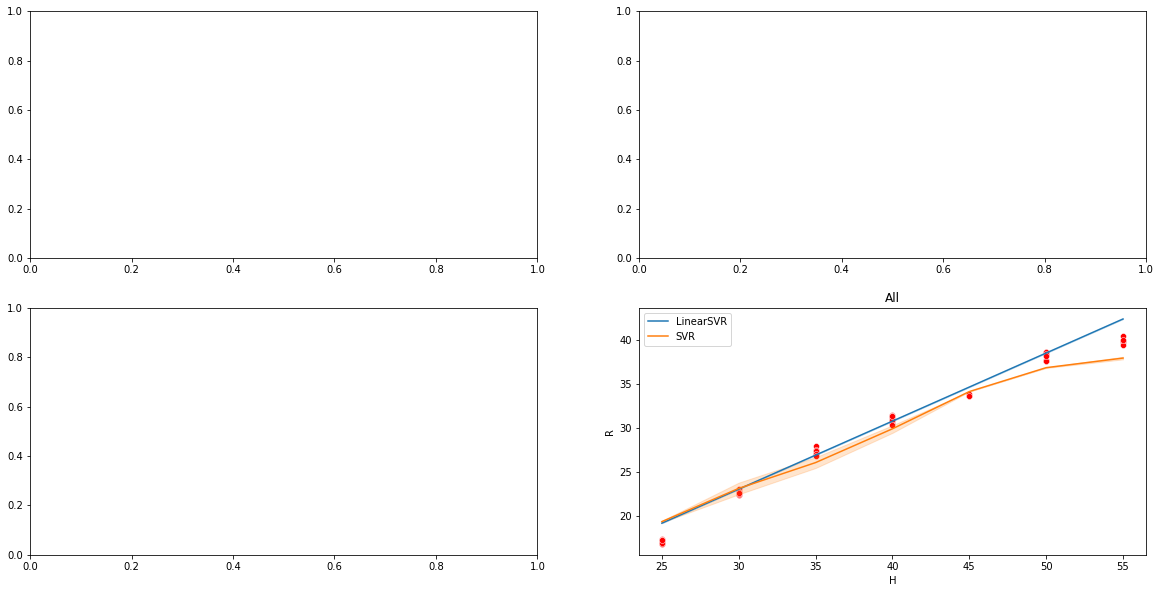

In [181]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes[0, 0].set_title("SVR")


axes[1, 1].set_title("All")
sns.scatterplot(x=x_test.H, y=y_test, color='red', ax=axes[1, 1])
sns.lineplot(x=x_test.H, y=y_pred_1.reshape(-1,), label="LinearSVR", ax=axes[1, 1])
sns.lineplot(x=x_test.H, y=y_pred_2.reshape(-1,), label="SVR", ax=axes[1, 1])

<AxesSubplot:xlabel='H', ylabel='R'>

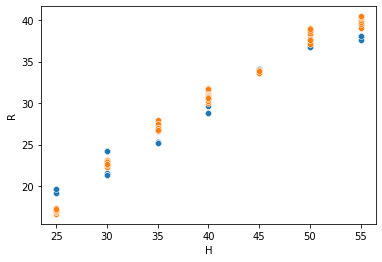

In [173]:
sns.scatterplot(x=x_test.H, y=y_pred_2.reshape(-1,))
sns.scatterplot(data=pre_trained_df, x='H', y='R')

## TODO:
- Use PolynomialFeatures